In [176]:
import os
import numpy as np
import pytesseract
import cv2
import matplotlib.pyplot as plt
import json

# debug 
isDebugMode = True

# 실행파일 위치저장
pytesseract.pytesseract.tesseract_cmd = "C:/Tesseract-OCR/tesseract.exe"

# 이미지 파일명
img_name = "raven8.jpg"

# 이미지 읽기
img = cv2.imread(img_name)

# 이미지 크기 확인
height, width, _ = img.shape

# 위치 배열 초기화 & 추가
locationInfos = []
def add_location(name, x1, y1, x2, y2, mode):
    locationInfos.append({'name': name,'x1': x1,'y1': y1,'x2': x2,'y2': y2,'mode': mode })

def show(template):
    plt.imshow(template)
    plt.show()
    
def debug(msg):
    if isDebugMode:
        print(msg)

def debugShow(template):
    if isDebugMode:
        show(template)

def convert(o):
    if isinstance(o, np.int64):
        return int(o)  
        
# 이미지 전처리
def preprocessing(img):
    # 그레이스케일
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 이진화
    _, binary = cv2.threshold(gray, 70, 255, cv2.THRESH_TOZERO)  
    
    # 외곽선 그리기
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(binary, contours, -1, (30, 30, 30),2)   
    binary = cv2.bitwise_not(binary) 
    # 이진화
    # _, binary = cv2.threshold(binary, 75, 255, cv2.THRESH_TOZERO)  
    return binary
 
class OCR:
    def __init__(self):
        pass
 
    def get(self, img, mode):
        
        show(img)
        # 전처리        
        if mode == 'img':
            roi_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            _, roi = cv2.threshold(roi_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            
        # show(roi)
        # 이미지 스캔             
        if mode == 'img':
            text = pytesseract.image_to_string(roi, lang='kor+eng --psm 6')
            return text
        else:
            return "Invalid language type"
    # def drawOutline

In [177]:

# 디렉토리 경로
directory_path = "template_img/"
# 디렉토리 내의 이미지 파일들을 리스트로 읽어오기
templates = []
files = []
for f in os.listdir(directory_path):
    if f.lower().endswith(('.png', '.jpg', '.jpeg')):
        # 템플릿 이미지를 그레이스케일로 읽어오기
        template = cv2.imread(os.path.join(directory_path, f))
        # 이진화 수행
        template_threshold = preprocessing(template)   

        # 이진화된 이미지를 템플릿 리스트에 추가
        templates.append(template_threshold)

        name, ext = os.path.splitext(f)
        files.append(name)
        

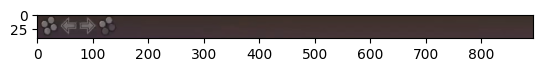

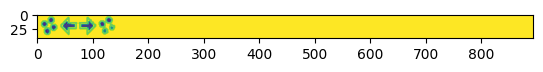

템플릿 0 ak  0.7874816656112671
템플릿 1 ap  0.9169819355010986


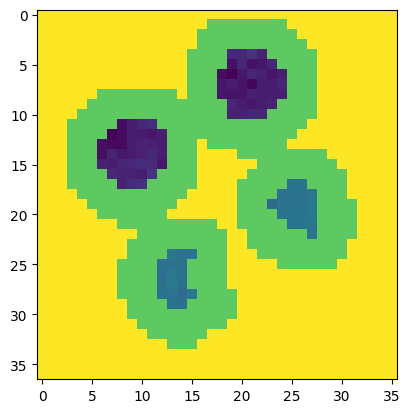

founded list : ap 1개
템플릿 2 apk  0.9736404418945312


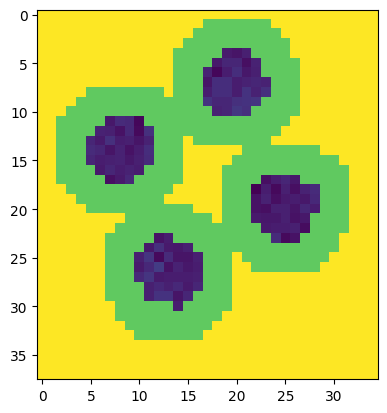

founded list : apk 1개
템플릿 3 arrow_2  0.6278901696205139
템플릿 4 arrow_3  0.5247082114219666
템플릿 5 arrow_3bold  0.32409363985061646
템플릿 6 arrow_4  0.9915933012962341


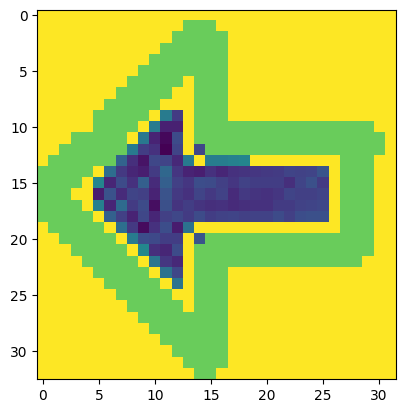

founded list : arrow_4 1개
템플릿 7 arrow_4bold  0.298936665058136
템플릿 8 arrow_6  0.9569573402404785


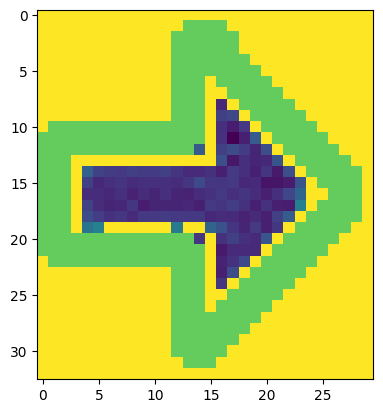

founded list : arrow_6 1개
템플릿 9 arrow_6bold  0.288431853055954
템플릿 10 arrow_7  0.5083205103874207
템플릿 11 arrow_9  0.531574547290802
템플릿 12 bracketL  0.34322452545166016
템플릿 13 bracketR  0.3606977164745331
템플릿 14 bracketRoundL  0.419521689414978
템플릿 15 bracketRoundR  0.423276424407959
템플릿 16 lk  0.8187888860702515
템플릿 17 lp  0.8096135258674622
템플릿 18 rk  0.7959191799163818
템플릿 19 rp  0.8679867386817932
[{'x': 5, 'y': 3, 'ratio': 0.97364044, 'command_img': 'apk'}, {'x': 42, 'y': 4, 'ratio': 0.9915933, 'command_img': 'arrow_4'}, {'x': 77, 'y': 4, 'ratio': 0.95695734, 'command_img': 'arrow_6'}, {'x': 108, 'y': 3, 'ratio': 0.91698194, 'command_img': 'ap'}]
{'x': 5, 'y': 3, 'ratio': 0.97364044, 'command_img': 'apk'}
{'x': 42, 'y': 4, 'ratio': 0.9915933, 'command_img': 'arrow_4'}
{'x': 77, 'y': 4, 'ratio': 0.95695734, 'command_img': 'arrow_6'}
{'x': 108, 'y': 3, 'ratio': 0.91698194, 'command_img': 'ap'}
{'text': '로 리\n', 'img': [{'x': 5, 'y': 3, 'ratio': 0.97364044, 'command_img': 'apk'}, {'x

In [178]:
# 클래스 인스턴스 생성
ocr = OCR()

# 결과값 dict
results = {}

# 위치 정보를 추가
add_location('command_img', 356, 168, 1250, 210, 'img')
# add_location('command2', 356, 168, 500, 210, 'img')


# 위치 배열을 순회하며 이미지에서 자르고 텍스트 읽어오기
for locationIndex, locationInfo in enumerate(locationInfos):
    name, mode = locationInfo['name'], locationInfo['mode']
     # 이미지에서 특정 구간 자르기 
    img_roi = img[locationInfo['y1']:locationInfo['y2'], locationInfo['x1']:locationInfo['x2']]
    
    item = {}
    item['text'] = ocr.get(img_roi, mode) # OCR 실행
        
    if mode == 'img':

        roi_threshold = preprocessing(img_roi) 
        debugShow(roi_threshold)
         
        # B1 템플릿 매칭 수행
        found_locations = []
        # debug("----------------------------------")
        for tidx, template in enumerate(templates):   
            
            # B1-1 템플릿 매칭 수행, 유사도 N% 이상인 위치 찾기
            result = cv2.matchTemplate(roi_threshold, template, cv2.TM_CCOEFF_NORMED)
            ratio = 0.90 
            matched = np.where(result >= ratio) 
 
            debug(f"템플릿 {tidx} {files[tidx]}  {result.max()}") # 최대 유사도 출력
            if len(matched[0]) > 0:
                if( isDebugMode ) :
                    debugShow(template)
                    debug(f"founded list : {files[tidx]} {len(matched[0])}개")
                # 찾은 위치와 유사도를 함께 저장
                for pt in zip(*matched[::-1]):
                    data = { 'x': pt[0], 'y': pt[1], 'ratio': result[pt[1], pt[0]], name: files[tidx] } 
                    found_locations.append(data)  
                    # debug(f">  {data}")
            
            # debug("----------------------------------")

        # 정렬 배열에 x 순서대로
        found_locations = sorted(found_locations, key=lambda x: x['x'])
        debug(found_locations)
        if( isDebugMode ) :
            # 결과 이미지에 템플릿 위치 표시
            for found_location in found_locations:
                print(found_location) 
                h, w = template.shape 
                x, y  = found_location['x'], found_location['y']
                top_left = (x, y)
                bottom_right = (x + w, y + h)
                cv2.rectangle(img_roi, top_left, bottom_right, 255, 2)
        
    # 결과값 저장
    item[mode] = found_locations
    print(item)
    results[name] = item
                

            
# 결과값 출력 
print('결과')
print(results)
print(json.dumps(results,default=convert, indent=4, ensure_ascii=False))

refined = json.dumps(results,default=convert, indent=4, ensure_ascii=False)
print(refined)
# 파일 저장
with open('result.json', 'w', encoding='utf-8') as make_file:
    json.dump(refined, make_file, ensure_ascii=False, indent='\t')

# 읽어온 텍스트와 위치 정보 출력 
# print(json.dumps(result, indent=4, ensure_ascii=False))
